
11490434/11490434 [==============================] - 46s 4us/step



Epoch 1/5


1500/1500 [==============================] - 36s 21ms/step - loss: 0.1406 - accuracy: 0.9569 - val_loss: 0.0655 - val_accuracy: 0.9801
Epoch 2/5
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0458 - accuracy: 0.9855 - val_loss: 0.0396 - val_accuracy: 0.9885
Epoch 3/5
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0310 - accuracy: 0.9902 - val_loss: 0.0398 - val_accuracy: 0.9884
Epoch 4/5
1500/1500 [==============================] - 50s 34ms/step - loss: 0.0213 - accuracy: 0.9929 - val_loss: 0.0391 - val_accuracy: 0.9887
Epoch 5/5
313/313 [==============================] - 7s 17ms/step - loss: 0.0307 - accuracy: 0.9902
Test Accuracy: 0.9901999831199646
313/313 [==============================] - 6s 16ms/step


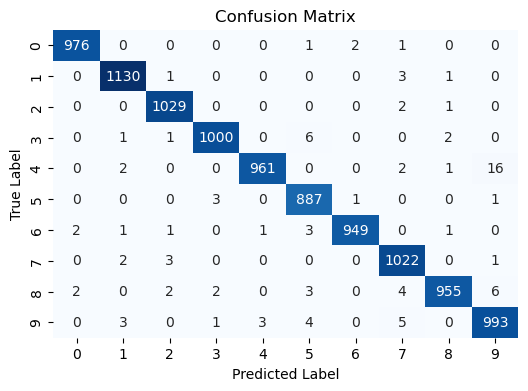

In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape input data to have a single channel
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Convert labels to one-hot encoded vectors
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)


y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)


cm = confusion_matrix(y_true_labels, y_pred_labels)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
minst.size